### Dataset on cardiovascular disease
#### Task: analyze data using sns, answer the questions
https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data

<div class="alert alert-block alert-info">
<b>Data:</b><br>   
Objective:$~~~~~~~~~~~$ factual information;<br>  
Examination:$~~~~~~~~~$ results of medical examination;<br>  
Subjective: $~~~~~~~~~$ information given by the patient.
 

| Feature                                       | Variable Type       | Variable    | Value Type                                       |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|
| Age                                           | Objective Feature   | age         | int (days)                                       |
| Height                                        | Objective Feature   | height      | int (cm)                                         |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |
| Physical activity                             | Subjective Feature  | active      | binary                                           |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |                                      |

</div>  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import warnings
import math
warnings.filterwarnings("ignore")

In [2]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [3]:
#dataset size
df = pd.read_csv('cardio_train.csv')
print('Dataset size: ', df.shape)

Dataset size:  (70000, 1)


In [4]:
#check dataset
df.head(2)#dataset wasn't split by columns

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1


In [5]:
#create columns for dataset
df=pd.read_csv('cardio_train.csv', sep=';')
print('Dataset size: ', df.shape)

Dataset size:  (70000, 13)


In [6]:
#check columns for dataset
df.head(3)#now dataset is split by columns

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


<div class="alert alert-block alert-warning">
<b>Question 1.1. :</b>
     How many men and women are present in this dataset? 
</div>


In [7]:
#check value counts for gender
df['gender'].value_counts()# gender 1= 45530, gender 2 =24470 people

1    45530
2    24470
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='weight'>

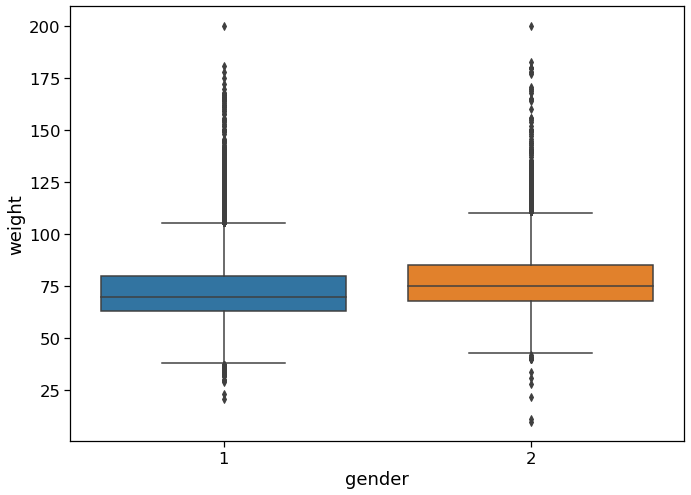

In [8]:
#what is gender 1,2?
sns.boxplot(x='gender',y='weight',data=df)#according to weight most likely gender 2=male

<AxesSubplot:xlabel='gender', ylabel='height'>

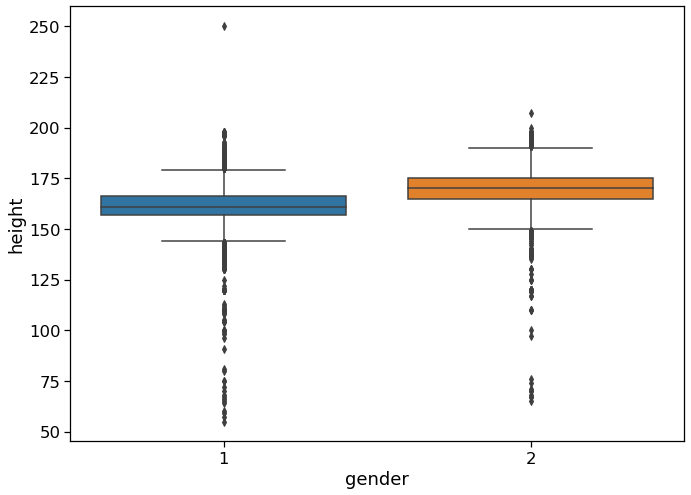

In [9]:
#what is gender 1,2?
sns.boxplot(x='gender',y='height',data=df)#according to height most likely gender 2=male

**So we can conclude that:** <br>
1-gender:    45530 women<br>
2-gender:    24470 men

<div class="alert alert-block alert-warning">
<b>Question 1.2. :</b>
     Which gender more often reports consuming alcohol - men or women?
</div>


<AxesSubplot:xlabel='gender', ylabel='count'>

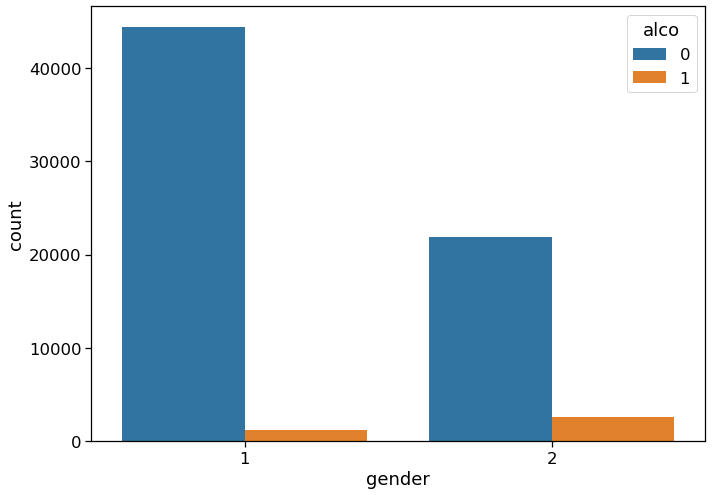

In [10]:
#who drink more and get into incidents?
sns.countplot(x='gender',hue='alco',data=df) 

**Answer:** men, but women are not too far

<div class="alert alert-block alert-warning">
<b>Question 1.3. :</b>
     What's the rounded difference between the percentages of smokers among men and women?

</div>

<AxesSubplot:xlabel='gender', ylabel='count'>

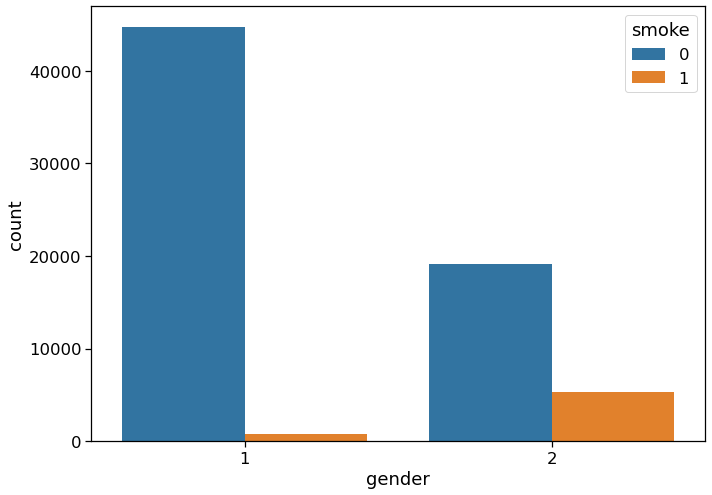

In [11]:
sns.countplot(x='gender',hue='smoke',data=df)

In [12]:
amount_of_men_smokers=df[(df['smoke']==1)&(df['gender']==2)].shape[0]
amount_of_women_smokers=df[(df['smoke']==1)&(df['gender']==1)].shape[0]

amount_of_men=df[(df['gender']==2)].shape[0]
amount_of_women=df[(df['gender']==1)].shape[0]

percentage_of_mensmoker_among_men=format((amount_of_men_smokers/amount_of_men),'.3f')
percentage_of_womensmoker_among_women=format((amount_of_women_smokers/amount_of_women),'.3f')

In [13]:
print('percentage_of_mensmoker_among_men: ' + str(percentage_of_mensmoker_among_men)
      +"\n" 
      'percentage_of_womensmoker_among_women: ' +str(percentage_of_womensmoker_among_women))

percentage_of_mensmoker_among_men: 0.219
percentage_of_womensmoker_among_women: 0.018


In [14]:
print('percentage_of_mensmoker_among_men - percentage_of_womensmoker_among_women: ' 
      + str(float(percentage_of_mensmoker_among_men) -  float(percentage_of_womensmoker_among_women) ))

percentage_of_mensmoker_among_men - percentage_of_womensmoker_among_women: 0.201


<div class="alert alert-block alert-warning">
<b>Question 1.4. :</b>
     What's the rounded difference between median values of age (in months) for smokers and non-smokers? You'll need to figure out the units of feature age in this dataset.<br>
5<br>
10<br>
15<br>
20<br>

</div>

In [15]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [16]:
df['age_month']=df['age'].apply(lambda i:i/30,41)

In [17]:
#now we have еру column 'age_month'
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,628.566667


In [18]:
median_ageinmonth_for_smokers=df[df['smoke']==1]['age_month'].median()
median_ageinmonth_for_smokers

637.5

In [19]:
median_ageinmonth_for_nonsmokers=df[df['smoke']==0]['age_month'].median()
median_ageinmonth_for_nonsmokers

657.4

In [20]:
#rounded difference between median values of age (in months) for smokers and non-smokers
rounded= median_ageinmonth_for_nonsmokers - median_ageinmonth_for_smokers 
rounded=(math.ceil(rounded))

In [21]:
#answer is 20
rounded


20

<div class="alert alert-block alert-warning">
<b>Question 1.5. :</b>
      Calculate fractions of ill people (with CVD) in two segments:<br>
    1)smoking+cholesterol=1 and ap_hi lower 120 <br>
     2)smoking+cholesterol3 and ap_hi higher 180                                                                                                                 
 What's the quotient of these two fractions?

</div>

[SCORE Risk Charts](https://www.escardio.org/static-file/Escardio/Subspecialty/EACPR/Documents/score-charts.pdf) 

*Let's take a look at the upper-right rectangle, which shows a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in the figure represent the upper bound).*

*We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).*

*Let's calculate that same ratio using our data.*

In [22]:
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667


In [23]:
#добавим столбик с времени жизни в годах
df['age_years'] = (df['age'] / 365.25).round().astype('int')
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667,55


In [24]:
#люди от [60:64] лет и курящие
risk_age_people=df[(df['age_years']>=60) & (df['age_years']<=64) & (df['smoke']==1) ]

In [25]:
risk_age_people.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,725.166667,60
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1,779.600000,64


In [26]:
#transform cholesterol to another form
# 4 mmol/l  →  1,
#5-7 mmol/l  →  2,
#8 mmol/l  →  3.

In [27]:
df['cholesterol_in_mmol']=pd.cut(df['cholesterol'],bins=3,labels=['4 mmol/l','5-7 mmol/l','8 mmol/l'])

In [28]:
#нов столбик cholesterol_in_mmol с другой формой записи cholesterol
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years,cholesterol_in_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000,50,4 mmol/l
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667,55,8 mmol/l


In [29]:
#риск сердечно-сосудистых заболеваний(CVD) среди группы риска пож курящих людей от 60-64
#1ая груп (smoking+cholesterol=1 and ap_hi lower 120)
risk_age_people[(risk_age_people['cholesterol'] == 1) & (risk_age_people['ap_hi'] < 120)]['cardio'].mean()

0.27710843373493976

In [30]:
#риск сердечно-сосудистых заболеваний(CVD) среди группы риска пож курящих людей от 60-64
#2ая груп (smoking+cholesterol3 and ap_hi higher 180)
risk_age_people[(risk_age_people['cholesterol'] == 3) &
               (risk_age_people['ap_hi'] >= 160) &
               (risk_age_people['ap_hi'] < 180)]['cardio'].mean()

0.8846153846153846

<div class="alert alert-block alert-warning">
<b>Question 1.7 :</b>
     Clean the data<br>
    
    Filter out the following patient segments (that we consider to have erroneous data)

diastilic pressure is higher then systolic.<br>
height is strictly less than 2.5%-percentile (use pd.Series.quantile. If not familiar with it – please read the docs)<br>
height is strictly more than 97.5%-percentile<br>
weight is strictly less then 2.5%-percentile<br>
weight is strictly more than 97.5%-percentile<br>

</div>

In [31]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years,cholesterol_in_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000,50,4 mmol/l
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667,55,8 mmol/l
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,628.566667,52,8 mmol/l


In [32]:
df_after_cleaning=df[   (df['ap_lo'] <= df['ap_hi']) 
                         &
                        (df['height']>= df['height'].quantile(0.025))
                         &
                        (df['height'] <= df['height'].quantile(0.975))
                         &
                        (df['weight'] >= df['weight'].quantile(0.025))
                         &
                        (df['weight'] <= df['weight'].quantile(0.975))                                     
                    ]

In [33]:
#кол-во записей до удаления мусора
df.shape[0]

70000

In [34]:
#кол-в записей после удаления мусора
df_after_cleaning.shape[0]

63259

In [35]:
#сделаем датафрейм после удаления мусора основным
df=df_after_cleaning

<div class="alert alert-block alert-warning">
<b>Question 2.1. :</b>
     Which pair of features has the strongest Pearson's correlation with the gender feature?<br>
Cardio, Cholesterol<br>
Height, Smoke<br>
Smoke, Alco<br>
Height, Weight<br>

</div>

<AxesSubplot:>

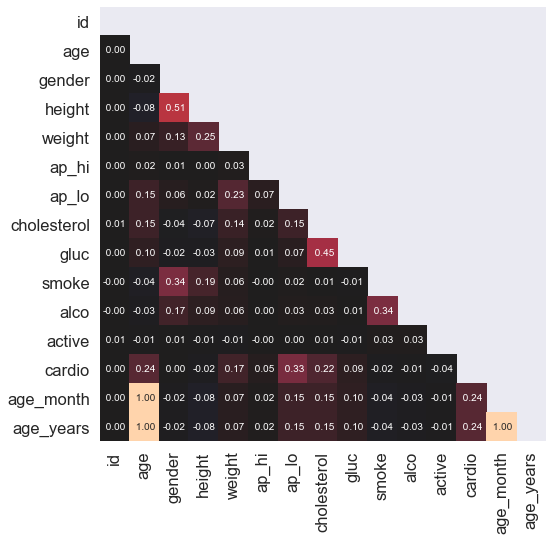

In [36]:
plt.figure(figsize=(8,8))
corr_matrix=df.corr()
lower=corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
 
sns.set_style('dark') 
sns.heatmap(lower, annot=True, fmt=' .2f', cbar=False, center=0,annot_kws={"size": 10})

In [37]:
print('Height, Smoke')

Height, Smoke


<div class="alert alert-block alert-warning">
<b>Question 2.2. :</b>
    Create a violin plot for the height and gender using violinplot()

</div>

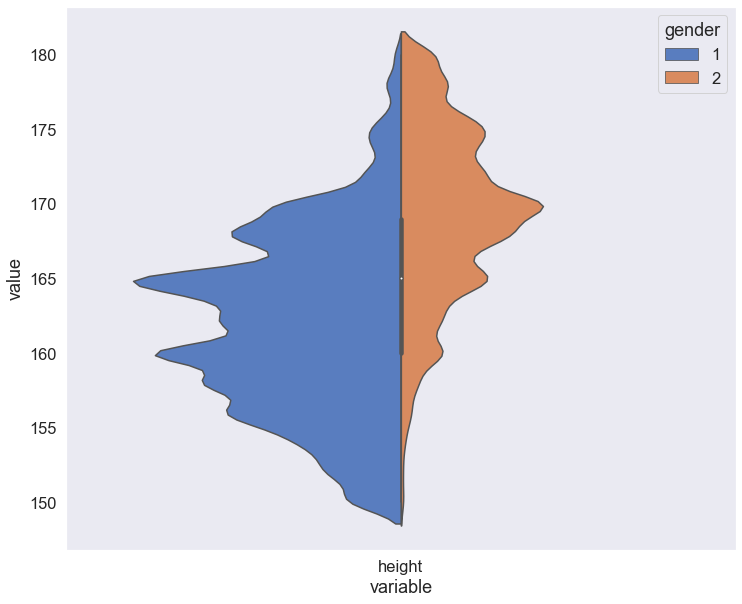

In [38]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

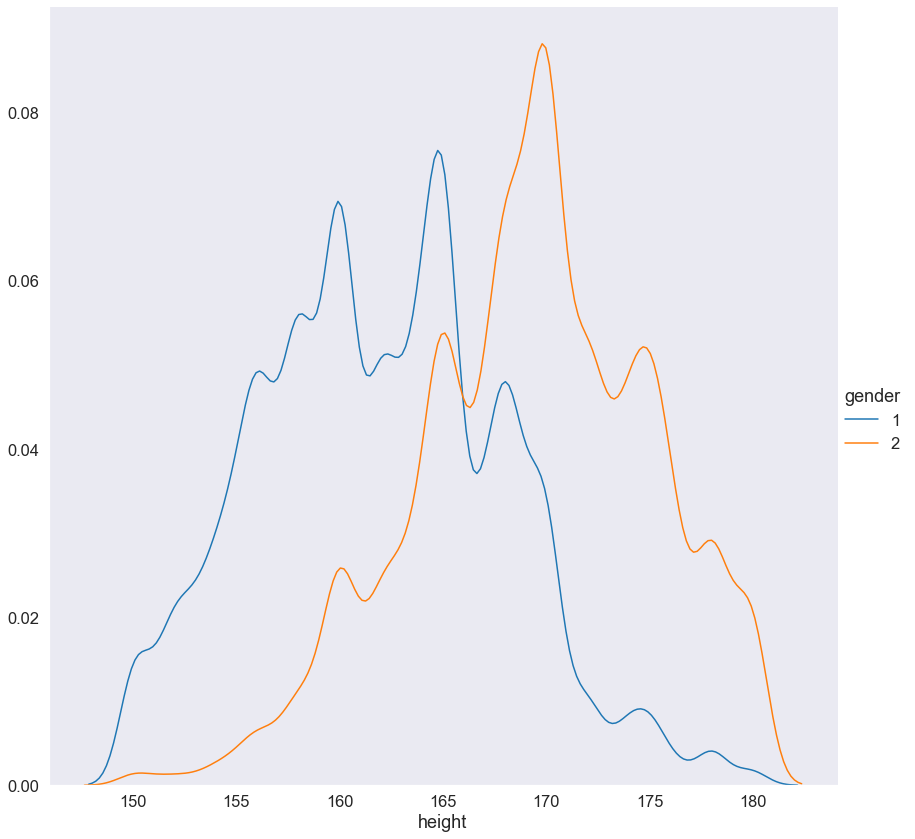

In [39]:
sns.FacetGrid(df, hue="gender", size=12) \
   .map(sns.kdeplot, "height").add_legend();

<div class="alert alert-block alert-warning">
<b>Question 2.3. :</b>
   Creat Spearman Rank correlation

</div>

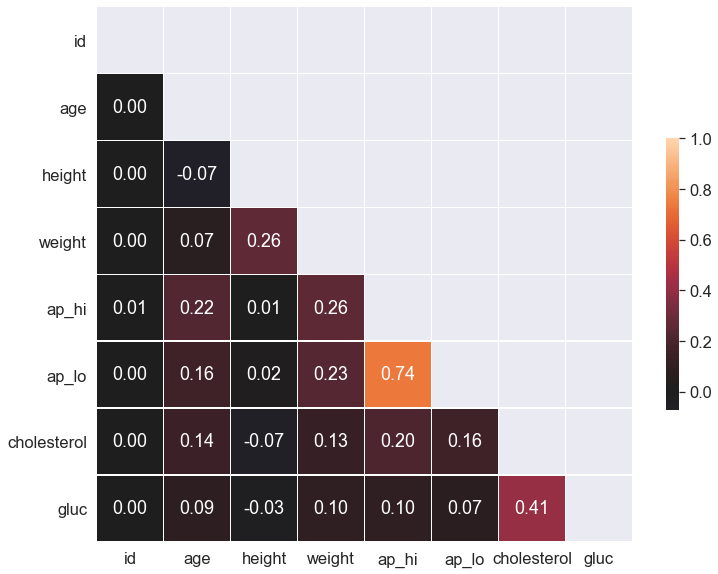

In [40]:
# Calculate the correlation matrix
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<div class="alert alert-block alert-warning">
<b>Question 2.4. :</b>
   Create a count plot using countplot(), with the age on the X axis and the number of people on the Y axis. Each value of the age should have two columns corresponding to the numbers of people of this age for each cardio class.

</div>

In [41]:
#our age is in days, lets create the columne 'age_years' in years
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years,cholesterol_in_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000,50,4 mmol/l
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667,55,8 mmol/l


In [42]:
df['age_years']=df['age']/365
df['age_years'].head(3)

0    50.391781
1    55.419178
2    51.663014
Name: age_years, dtype: float64

In [43]:
t=lambda i:math.ceil(i)

In [44]:
df['age_years']=df['age_years'].apply(t)

In [45]:
#now we have columne 'age_years' in year 
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_month,age_years,cholesterol_in_mmol
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,613.100000,51,4 mmol/l
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,674.266667,56,8 mmol/l


<AxesSubplot:xlabel='age_years', ylabel='count'>

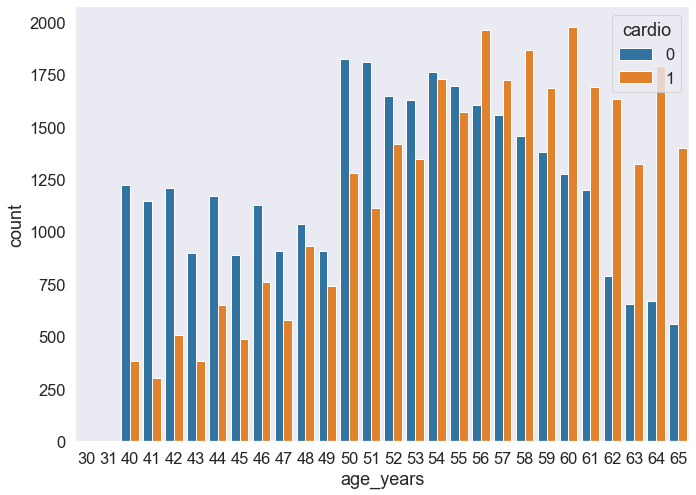

In [46]:
sns.countplot(x='age_years',hue='cardio',data=df)